# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

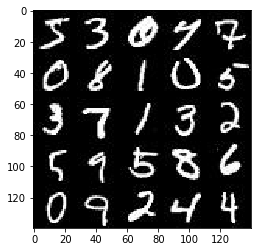

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

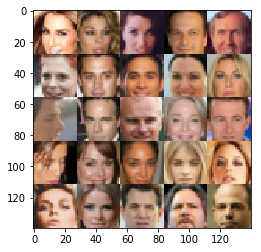

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

D:\Development\Anaconda\envs\dog-windows-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0 # RELU
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 32, 5, strides = 2, padding='same')
        relu1 = tf.maximum(alpha*x1, x1)
        #14x14x32
        
        x2 = tf.layers.conv2d(relu1, 64, 5, strides = 2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        #7x7x64
                
        flat = tf.reshape(relu2, (-1, 7*7*64))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2 #Leaky RELU factor
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, z.shape[1])
        
        #Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,64))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1 )#Leaky RELU
        #7x7x64
        
        x2 = tf.layers.conv2d_transpose(x1, 32, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)#Leaky RELU
        #14x14x32
        
        #Output layer , 28x28x3
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        
        return logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print_every = 10
    show_every=100
    steps = 0

    inputs_real, inputs_z, learning_rate_var = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    d_train_opt, g_train_opt  = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    config = tf.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 0.6 # This is to make sure that the GPU does not run out of Memory.

    
    with tf.Session(config=config) as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                # TODO: Train Model
                # Run optimizers                
                batch_z = np.random.normal(0, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                    train_loss_g = g_loss.eval({inputs_real: batch_images, inputs_z: batch_z, learning_rate_var: learning_rate})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:                    
                    show_generator_output(sess, 10, inputs_z, data_shape[3], data_image_mode)
                    


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 3.0379... Generator Loss: 0.0846
Epoch 1/2... Discriminator Loss: 2.5656... Generator Loss: 0.1399
Epoch 1/2... Discriminator Loss: 0.7856... Generator Loss: 1.0881
Epoch 1/2... Discriminator Loss: 2.4425... Generator Loss: 0.2755
Epoch 1/2... Discriminator Loss: 1.0122... Generator Loss: 0.6388
Epoch 1/2... Discriminator Loss: 2.3698... Generator Loss: 0.2068
Epoch 1/2... Discriminator Loss: 1.6554... Generator Loss: 0.4082
Epoch 1/2... Discriminator Loss: 1.7196... Generator Loss: 0.2734
Epoch 1/2... Discriminator Loss: 1.0106... Generator Loss: 0.6640
Epoch 1/2... Discriminator Loss: 1.0956... Generator Loss: 0.5645


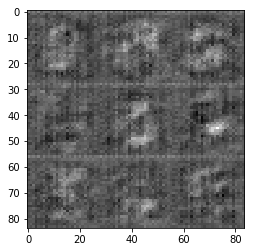

Epoch 1/2... Discriminator Loss: 0.8085... Generator Loss: 0.8106
Epoch 1/2... Discriminator Loss: 3.0606... Generator Loss: 0.0509
Epoch 1/2... Discriminator Loss: 1.1042... Generator Loss: 0.6014
Epoch 1/2... Discriminator Loss: 1.3228... Generator Loss: 0.4200
Epoch 1/2... Discriminator Loss: 1.2023... Generator Loss: 0.6824
Epoch 1/2... Discriminator Loss: 1.0728... Generator Loss: 0.6510
Epoch 1/2... Discriminator Loss: 0.8126... Generator Loss: 0.8356
Epoch 1/2... Discriminator Loss: 0.9584... Generator Loss: 0.7783
Epoch 1/2... Discriminator Loss: 1.0626... Generator Loss: 0.6828
Epoch 1/2... Discriminator Loss: 0.5375... Generator Loss: 1.1570


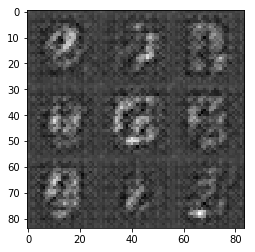

Epoch 1/2... Discriminator Loss: 1.1233... Generator Loss: 0.6045
Epoch 1/2... Discriminator Loss: 0.7539... Generator Loss: 0.9183
Epoch 1/2... Discriminator Loss: 0.7817... Generator Loss: 0.9495
Epoch 1/2... Discriminator Loss: 0.6318... Generator Loss: 1.0710
Epoch 1/2... Discriminator Loss: 0.4015... Generator Loss: 1.6813
Epoch 1/2... Discriminator Loss: 1.0946... Generator Loss: 0.6153
Epoch 1/2... Discriminator Loss: 0.6369... Generator Loss: 1.1065
Epoch 1/2... Discriminator Loss: 0.3615... Generator Loss: 1.8141
Epoch 1/2... Discriminator Loss: 0.6918... Generator Loss: 0.9723
Epoch 1/2... Discriminator Loss: 0.6124... Generator Loss: 1.2606


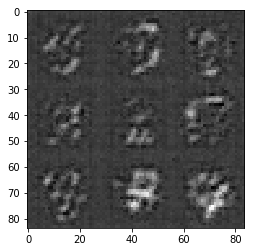

Epoch 1/2... Discriminator Loss: 0.9883... Generator Loss: 0.6290
Epoch 1/2... Discriminator Loss: 0.5855... Generator Loss: 1.1121
Epoch 1/2... Discriminator Loss: 0.9561... Generator Loss: 0.6973
Epoch 1/2... Discriminator Loss: 0.7140... Generator Loss: 0.9029
Epoch 1/2... Discriminator Loss: 0.1522... Generator Loss: 2.9860
Epoch 1/2... Discriminator Loss: 0.4613... Generator Loss: 1.3332
Epoch 1/2... Discriminator Loss: 0.4366... Generator Loss: 1.4129
Epoch 1/2... Discriminator Loss: 0.4325... Generator Loss: 1.4804
Epoch 1/2... Discriminator Loss: 0.4571... Generator Loss: 1.4899
Epoch 1/2... Discriminator Loss: 0.5169... Generator Loss: 1.1902


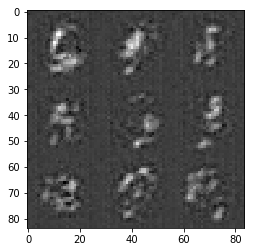

Epoch 1/2... Discriminator Loss: 0.9029... Generator Loss: 0.8397
Epoch 1/2... Discriminator Loss: 0.5284... Generator Loss: 1.2907
Epoch 1/2... Discriminator Loss: 0.6292... Generator Loss: 1.0381
Epoch 1/2... Discriminator Loss: 0.3641... Generator Loss: 1.5260
Epoch 1/2... Discriminator Loss: 1.3981... Generator Loss: 0.4311
Epoch 1/2... Discriminator Loss: 0.3926... Generator Loss: 1.5280
Epoch 1/2... Discriminator Loss: 0.6433... Generator Loss: 1.0167
Epoch 1/2... Discriminator Loss: 0.5114... Generator Loss: 1.3010
Epoch 1/2... Discriminator Loss: 0.3967... Generator Loss: 1.4494
Epoch 1/2... Discriminator Loss: 0.2642... Generator Loss: 1.7889


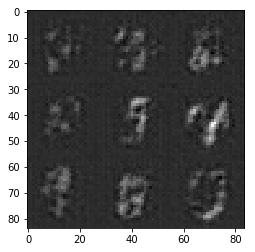

Epoch 1/2... Discriminator Loss: 0.6032... Generator Loss: 0.9784
Epoch 1/2... Discriminator Loss: 1.3484... Generator Loss: 0.4927
Epoch 1/2... Discriminator Loss: 0.7761... Generator Loss: 0.8580
Epoch 1/2... Discriminator Loss: 0.3990... Generator Loss: 1.6154
Epoch 1/2... Discriminator Loss: 0.7483... Generator Loss: 0.9618
Epoch 1/2... Discriminator Loss: 2.0253... Generator Loss: 0.3320
Epoch 1/2... Discriminator Loss: 0.9345... Generator Loss: 1.4132
Epoch 1/2... Discriminator Loss: 1.0325... Generator Loss: 0.7234
Epoch 1/2... Discriminator Loss: 0.9511... Generator Loss: 0.6595
Epoch 1/2... Discriminator Loss: 0.9175... Generator Loss: 0.7186


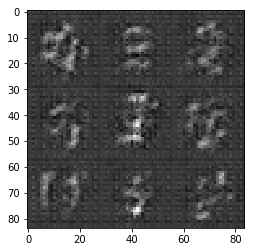

Epoch 1/2... Discriminator Loss: 0.7318... Generator Loss: 0.8526
Epoch 1/2... Discriminator Loss: 1.2244... Generator Loss: 0.4297
Epoch 1/2... Discriminator Loss: 0.9725... Generator Loss: 0.5804
Epoch 1/2... Discriminator Loss: 1.0548... Generator Loss: 0.5358
Epoch 1/2... Discriminator Loss: 1.0137... Generator Loss: 0.5770
Epoch 1/2... Discriminator Loss: 1.1001... Generator Loss: 0.4991
Epoch 1/2... Discriminator Loss: 1.2013... Generator Loss: 0.4423
Epoch 1/2... Discriminator Loss: 1.4585... Generator Loss: 0.3328
Epoch 1/2... Discriminator Loss: 0.4150... Generator Loss: 1.3451
Epoch 1/2... Discriminator Loss: 1.1599... Generator Loss: 0.4619


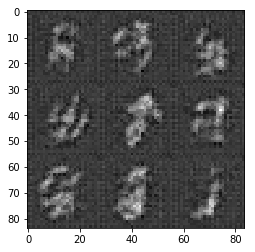

Epoch 1/2... Discriminator Loss: 0.8229... Generator Loss: 0.6738
Epoch 1/2... Discriminator Loss: 0.7480... Generator Loss: 0.7662
Epoch 1/2... Discriminator Loss: 0.5888... Generator Loss: 0.9818
Epoch 1/2... Discriminator Loss: 0.6416... Generator Loss: 0.9215
Epoch 1/2... Discriminator Loss: 0.2360... Generator Loss: 1.8270
Epoch 1/2... Discriminator Loss: 0.3928... Generator Loss: 1.5047
Epoch 1/2... Discriminator Loss: 0.2868... Generator Loss: 1.6411
Epoch 1/2... Discriminator Loss: 0.6088... Generator Loss: 0.9810
Epoch 1/2... Discriminator Loss: 0.3290... Generator Loss: 1.6595
Epoch 1/2... Discriminator Loss: 0.0385... Generator Loss: 4.1953


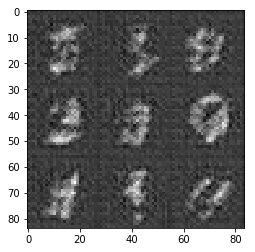

Epoch 1/2... Discriminator Loss: 0.0199... Generator Loss: 6.1281
Epoch 1/2... Discriminator Loss: 0.6896... Generator Loss: 0.8882
Epoch 1/2... Discriminator Loss: 1.0243... Generator Loss: 0.6026
Epoch 1/2... Discriminator Loss: 0.1405... Generator Loss: 2.5476
Epoch 1/2... Discriminator Loss: 0.4413... Generator Loss: 1.3682
Epoch 1/2... Discriminator Loss: 0.1113... Generator Loss: 2.6820
Epoch 1/2... Discriminator Loss: 0.0107... Generator Loss: 6.0632
Epoch 1/2... Discriminator Loss: 0.2469... Generator Loss: 1.9508
Epoch 1/2... Discriminator Loss: 0.6578... Generator Loss: 0.9115
Epoch 1/2... Discriminator Loss: 0.1779... Generator Loss: 2.4139


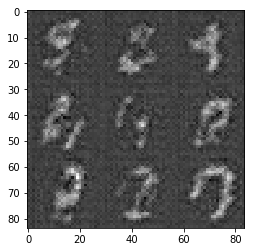

Epoch 1/2... Discriminator Loss: 0.0658... Generator Loss: 3.6018
Epoch 1/2... Discriminator Loss: 0.0348... Generator Loss: 4.3023
Epoch 1/2... Discriminator Loss: 0.5190... Generator Loss: 1.0989
Epoch 2/2... Discriminator Loss: 0.4993... Generator Loss: 1.1525
Epoch 2/2... Discriminator Loss: 0.3609... Generator Loss: 1.3989
Epoch 2/2... Discriminator Loss: 0.0703... Generator Loss: 3.4645
Epoch 2/2... Discriminator Loss: 0.3872... Generator Loss: 1.5024
Epoch 2/2... Discriminator Loss: 0.0312... Generator Loss: 4.3344
Epoch 2/2... Discriminator Loss: 0.0062... Generator Loss: 7.1891
Epoch 2/2... Discriminator Loss: 0.0172... Generator Loss: 5.7785


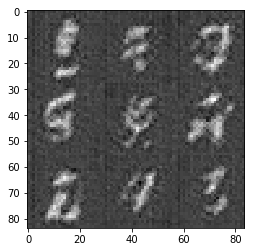

Epoch 2/2... Discriminator Loss: 0.1539... Generator Loss: 2.6031
Epoch 2/2... Discriminator Loss: 0.0363... Generator Loss: 4.3145
Epoch 2/2... Discriminator Loss: 0.1983... Generator Loss: 2.1237
Epoch 2/2... Discriminator Loss: 0.1955... Generator Loss: 2.0081
Epoch 2/2... Discriminator Loss: 0.0175... Generator Loss: 5.2280
Epoch 2/2... Discriminator Loss: 0.0055... Generator Loss: 9.1283
Epoch 2/2... Discriminator Loss: 0.0208... Generator Loss: 5.0309
Epoch 2/2... Discriminator Loss: 1.2754... Generator Loss: 1.2278
Epoch 2/2... Discriminator Loss: 0.6897... Generator Loss: 1.4714
Epoch 2/2... Discriminator Loss: 0.9855... Generator Loss: 0.6553


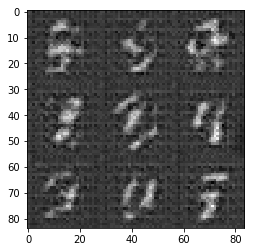

Epoch 2/2... Discriminator Loss: 0.7808... Generator Loss: 0.7991
Epoch 2/2... Discriminator Loss: 0.1117... Generator Loss: 3.3723
Epoch 2/2... Discriminator Loss: 0.2967... Generator Loss: 1.8048
Epoch 2/2... Discriminator Loss: 0.9057... Generator Loss: 0.6300
Epoch 2/2... Discriminator Loss: 0.6630... Generator Loss: 0.8629
Epoch 2/2... Discriminator Loss: 0.0491... Generator Loss: 4.8501
Epoch 2/2... Discriminator Loss: 0.1688... Generator Loss: 2.3638
Epoch 2/2... Discriminator Loss: 0.2836... Generator Loss: 1.7034
Epoch 2/2... Discriminator Loss: 0.4633... Generator Loss: 1.2196
Epoch 2/2... Discriminator Loss: 0.6296... Generator Loss: 0.9940


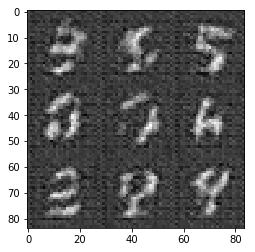

Epoch 2/2... Discriminator Loss: 0.5560... Generator Loss: 1.0473
Epoch 2/2... Discriminator Loss: 0.1020... Generator Loss: 3.0822
Epoch 2/2... Discriminator Loss: 0.0156... Generator Loss: 8.1825
Epoch 2/2... Discriminator Loss: 0.4020... Generator Loss: 1.3617
Epoch 2/2... Discriminator Loss: 0.5851... Generator Loss: 0.9633
Epoch 2/2... Discriminator Loss: 0.1307... Generator Loss: 2.4809
Epoch 2/2... Discriminator Loss: 0.8340... Generator Loss: 0.7879
Epoch 2/2... Discriminator Loss: 0.0526... Generator Loss: 5.4156
Epoch 2/2... Discriminator Loss: 0.2047... Generator Loss: 2.3553
Epoch 2/2... Discriminator Loss: 0.0351... Generator Loss: 4.4902


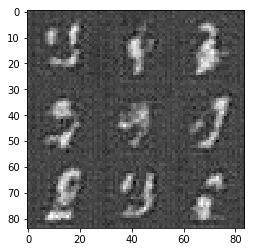

Epoch 2/2... Discriminator Loss: 0.5172... Generator Loss: 1.1867
Epoch 2/2... Discriminator Loss: 0.0663... Generator Loss: 3.5750
Epoch 2/2... Discriminator Loss: 0.0124... Generator Loss: 6.0817
Epoch 2/2... Discriminator Loss: 0.0252... Generator Loss: 4.3478
Epoch 2/2... Discriminator Loss: 0.8410... Generator Loss: 0.8248
Epoch 2/2... Discriminator Loss: 0.0943... Generator Loss: 3.0346
Epoch 2/2... Discriminator Loss: 0.0091... Generator Loss: 8.9620
Epoch 2/2... Discriminator Loss: 0.0235... Generator Loss: 4.8009
Epoch 2/2... Discriminator Loss: 0.3688... Generator Loss: 1.6410
Epoch 2/2... Discriminator Loss: 0.0207... Generator Loss: 5.0004


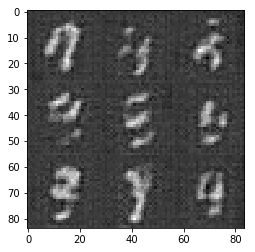

Epoch 2/2... Discriminator Loss: 0.0421... Generator Loss: 4.3670
Epoch 2/2... Discriminator Loss: 0.0187... Generator Loss: 7.7160
Epoch 2/2... Discriminator Loss: 0.0205... Generator Loss: 5.1091
Epoch 2/2... Discriminator Loss: 0.1543... Generator Loss: 2.5190
Epoch 2/2... Discriminator Loss: 0.2745... Generator Loss: 1.6909
Epoch 2/2... Discriminator Loss: 0.0069... Generator Loss: 7.1472
Epoch 2/2... Discriminator Loss: 0.0124... Generator Loss: 6.4418
Epoch 2/2... Discriminator Loss: 0.1560... Generator Loss: 2.6050
Epoch 2/2... Discriminator Loss: 0.0333... Generator Loss: 4.3875
Epoch 2/2... Discriminator Loss: 0.0289... Generator Loss: 7.3132


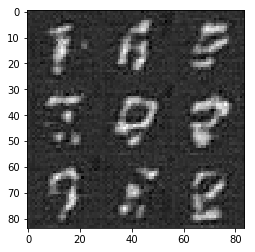

Epoch 2/2... Discriminator Loss: 0.0275... Generator Loss: 5.9292
Epoch 2/2... Discriminator Loss: 0.0098... Generator Loss: 8.8358
Epoch 2/2... Discriminator Loss: 0.0141... Generator Loss: 5.6681
Epoch 2/2... Discriminator Loss: 0.2321... Generator Loss: 2.0076
Epoch 2/2... Discriminator Loss: 0.3447... Generator Loss: 1.6483
Epoch 2/2... Discriminator Loss: 0.0101... Generator Loss: 6.5980
Epoch 2/2... Discriminator Loss: 0.0073... Generator Loss: 10.0645
Epoch 2/2... Discriminator Loss: 0.0081... Generator Loss: 6.7672
Epoch 2/2... Discriminator Loss: 0.0350... Generator Loss: 4.4459
Epoch 2/2... Discriminator Loss: 0.0046... Generator Loss: 11.1851


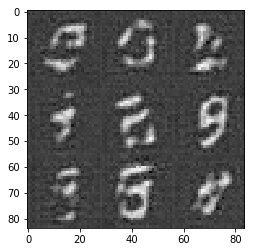

Epoch 2/2... Discriminator Loss: 0.5098... Generator Loss: 1.3331
Epoch 2/2... Discriminator Loss: 10.8057... Generator Loss: 0.0001
Epoch 2/2... Discriminator Loss: 0.9544... Generator Loss: 2.7409
Epoch 2/2... Discriminator Loss: 1.9459... Generator Loss: 0.2268
Epoch 2/2... Discriminator Loss: 0.6682... Generator Loss: 1.0017
Epoch 2/2... Discriminator Loss: 0.5374... Generator Loss: 1.3838
Epoch 2/2... Discriminator Loss: 0.4648... Generator Loss: 1.3842
Epoch 2/2... Discriminator Loss: 0.4429... Generator Loss: 1.6174
Epoch 2/2... Discriminator Loss: 0.4352... Generator Loss: 1.4993
Epoch 2/2... Discriminator Loss: 0.5109... Generator Loss: 1.2091


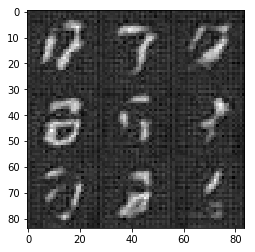

Epoch 2/2... Discriminator Loss: 0.4908... Generator Loss: 1.2370
Epoch 2/2... Discriminator Loss: 0.4271... Generator Loss: 1.5651
Epoch 2/2... Discriminator Loss: 0.6256... Generator Loss: 1.0123
Epoch 2/2... Discriminator Loss: 0.4325... Generator Loss: 1.3682
Epoch 2/2... Discriminator Loss: 0.3407... Generator Loss: 1.6857
Epoch 2/2... Discriminator Loss: 0.3435... Generator Loss: 1.6684
Epoch 2/2... Discriminator Loss: 0.3137... Generator Loss: 1.8939
Epoch 2/2... Discriminator Loss: 0.2780... Generator Loss: 1.8904
Epoch 2/2... Discriminator Loss: 0.1798... Generator Loss: 2.3410
Epoch 2/2... Discriminator Loss: 2.4445... Generator Loss: 0.1405


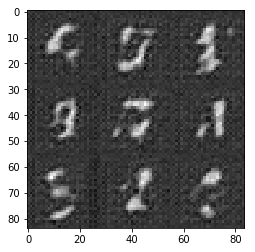

Epoch 2/2... Discriminator Loss: 0.6948... Generator Loss: 1.0145
Epoch 2/2... Discriminator Loss: 0.9294... Generator Loss: 0.7055
Epoch 2/2... Discriminator Loss: 0.2889... Generator Loss: 1.9435
Epoch 2/2... Discriminator Loss: 0.3847... Generator Loss: 1.4889
Epoch 2/2... Discriminator Loss: 0.5520... Generator Loss: 1.1522
Epoch 2/2... Discriminator Loss: 0.2913... Generator Loss: 1.8737
Epoch 2/2... Discriminator Loss: 0.3223... Generator Loss: 1.7506


In [12]:

batch_size = 64
z_dim = 3136
learning_rate = 0.001
beta1 = 0.5 # AS per GAN paper, this is the optimal value


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.4021... Generator Loss: 0.0778
Epoch 1/1... Discriminator Loss: 2.4760... Generator Loss: 0.1677
Epoch 1/1... Discriminator Loss: 1.8314... Generator Loss: 0.3826
Epoch 1/1... Discriminator Loss: 1.8326... Generator Loss: 0.4839
Epoch 1/1... Discriminator Loss: 1.4468... Generator Loss: 0.7257
Epoch 1/1... Discriminator Loss: 0.3821... Generator Loss: 2.8395
Epoch 1/1... Discriminator Loss: 0.6065... Generator Loss: 1.4544
Epoch 1/1... Discriminator Loss: 0.7962... Generator Loss: 1.0955
Epoch 1/1... Discriminator Loss: 1.2232... Generator Loss: 3.2605
Epoch 1/1... Discriminator Loss: 2.1395... Generator Loss: 0.2907


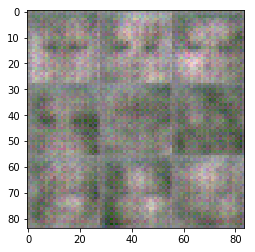

Epoch 1/1... Discriminator Loss: 0.8700... Generator Loss: 2.0872
Epoch 1/1... Discriminator Loss: 0.9023... Generator Loss: 0.8022
Epoch 1/1... Discriminator Loss: 0.2630... Generator Loss: 2.6040
Epoch 1/1... Discriminator Loss: 1.6824... Generator Loss: 0.2855
Epoch 1/1... Discriminator Loss: 2.0443... Generator Loss: 1.1562
Epoch 1/1... Discriminator Loss: 1.5872... Generator Loss: 0.2811
Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.9081... Generator Loss: 0.3037
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.6217
Epoch 1/1... Discriminator Loss: 1.9815... Generator Loss: 0.2201


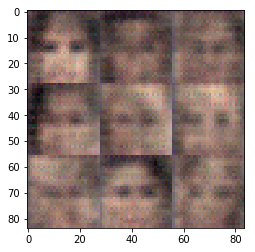

Epoch 1/1... Discriminator Loss: 2.4801... Generator Loss: 0.1128
Epoch 1/1... Discriminator Loss: 2.4580... Generator Loss: 0.1265
Epoch 1/1... Discriminator Loss: 2.1142... Generator Loss: 0.5068
Epoch 1/1... Discriminator Loss: 2.5932... Generator Loss: 0.1157
Epoch 1/1... Discriminator Loss: 1.9382... Generator Loss: 0.5033
Epoch 1/1... Discriminator Loss: 2.5924... Generator Loss: 0.1262
Epoch 1/1... Discriminator Loss: 2.0209... Generator Loss: 0.2605
Epoch 1/1... Discriminator Loss: 2.2330... Generator Loss: 0.2015
Epoch 1/1... Discriminator Loss: 1.6408... Generator Loss: 0.7243
Epoch 1/1... Discriminator Loss: 2.6320... Generator Loss: 0.1125


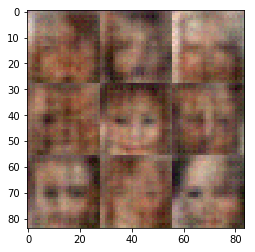

Epoch 1/1... Discriminator Loss: 2.5700... Generator Loss: 0.1335
Epoch 1/1... Discriminator Loss: 2.8084... Generator Loss: 0.0822
Epoch 1/1... Discriminator Loss: 2.0148... Generator Loss: 0.4865
Epoch 1/1... Discriminator Loss: 1.9763... Generator Loss: 0.3235
Epoch 1/1... Discriminator Loss: 2.2973... Generator Loss: 0.1830
Epoch 1/1... Discriminator Loss: 1.8137... Generator Loss: 0.2398
Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 0.5356
Epoch 1/1... Discriminator Loss: 2.2543... Generator Loss: 0.4143
Epoch 1/1... Discriminator Loss: 2.5403... Generator Loss: 0.1111
Epoch 1/1... Discriminator Loss: 2.1993... Generator Loss: 0.1571


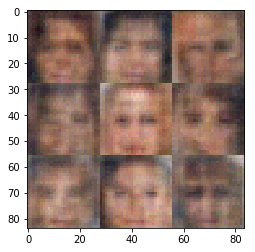

Epoch 1/1... Discriminator Loss: 2.3243... Generator Loss: 0.1346
Epoch 1/1... Discriminator Loss: 2.9719... Generator Loss: 0.0671
Epoch 1/1... Discriminator Loss: 2.1054... Generator Loss: 0.9677
Epoch 1/1... Discriminator Loss: 2.8660... Generator Loss: 0.0850
Epoch 1/1... Discriminator Loss: 1.3985... Generator Loss: 0.4729
Epoch 1/1... Discriminator Loss: 2.8815... Generator Loss: 0.0864
Epoch 1/1... Discriminator Loss: 2.5961... Generator Loss: 0.8936
Epoch 1/1... Discriminator Loss: 2.6440... Generator Loss: 0.1020
Epoch 1/1... Discriminator Loss: 3.2525... Generator Loss: 0.0649
Epoch 1/1... Discriminator Loss: 1.8952... Generator Loss: 0.3670


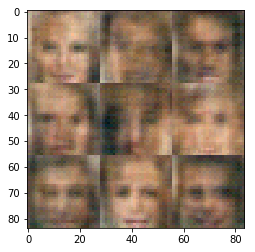

Epoch 1/1... Discriminator Loss: 1.6317... Generator Loss: 0.3520
Epoch 1/1... Discriminator Loss: 1.8017... Generator Loss: 0.2770
Epoch 1/1... Discriminator Loss: 1.5255... Generator Loss: 0.4561
Epoch 1/1... Discriminator Loss: 1.6255... Generator Loss: 0.4189
Epoch 1/1... Discriminator Loss: 2.7510... Generator Loss: 0.1159
Epoch 1/1... Discriminator Loss: 1.8693... Generator Loss: 0.2649
Epoch 1/1... Discriminator Loss: 3.5888... Generator Loss: 0.0349
Epoch 1/1... Discriminator Loss: 0.9732... Generator Loss: 0.6477
Epoch 1/1... Discriminator Loss: 0.6950... Generator Loss: 1.0211
Epoch 1/1... Discriminator Loss: 2.0337... Generator Loss: 0.2107


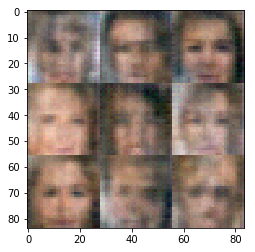

Epoch 1/1... Discriminator Loss: 1.6752... Generator Loss: 0.2952
Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 0.4615
Epoch 1/1... Discriminator Loss: 2.3112... Generator Loss: 0.1470
Epoch 1/1... Discriminator Loss: 2.3598... Generator Loss: 0.1731
Epoch 1/1... Discriminator Loss: 2.6366... Generator Loss: 0.1073
Epoch 1/1... Discriminator Loss: 0.8829... Generator Loss: 0.8919
Epoch 1/1... Discriminator Loss: 1.8776... Generator Loss: 0.2290
Epoch 1/1... Discriminator Loss: 2.9345... Generator Loss: 0.0773
Epoch 1/1... Discriminator Loss: 1.9381... Generator Loss: 0.2885
Epoch 1/1... Discriminator Loss: 2.7024... Generator Loss: 0.1028


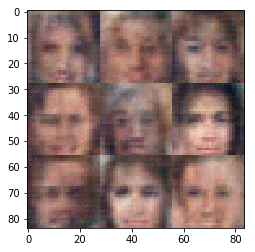

Epoch 1/1... Discriminator Loss: 2.2232... Generator Loss: 0.1835
Epoch 1/1... Discriminator Loss: 2.1676... Generator Loss: 0.2424
Epoch 1/1... Discriminator Loss: 2.5653... Generator Loss: 0.1207
Epoch 1/1... Discriminator Loss: 1.7057... Generator Loss: 0.3549
Epoch 1/1... Discriminator Loss: 2.1580... Generator Loss: 0.2154
Epoch 1/1... Discriminator Loss: 3.5432... Generator Loss: 0.0358
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.5226
Epoch 1/1... Discriminator Loss: 2.3015... Generator Loss: 0.4480
Epoch 1/1... Discriminator Loss: 1.6389... Generator Loss: 0.4260
Epoch 1/1... Discriminator Loss: 2.2775... Generator Loss: 0.1961


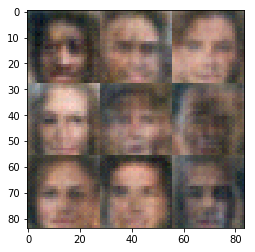

Epoch 1/1... Discriminator Loss: 1.6505... Generator Loss: 0.4930
Epoch 1/1... Discriminator Loss: 1.8978... Generator Loss: 0.2642
Epoch 1/1... Discriminator Loss: 2.2961... Generator Loss: 0.1566
Epoch 1/1... Discriminator Loss: 2.1017... Generator Loss: 0.2360
Epoch 1/1... Discriminator Loss: 2.1681... Generator Loss: 0.3085
Epoch 1/1... Discriminator Loss: 2.3452... Generator Loss: 0.1633
Epoch 1/1... Discriminator Loss: 1.4012... Generator Loss: 0.4627
Epoch 1/1... Discriminator Loss: 2.2552... Generator Loss: 0.2643
Epoch 1/1... Discriminator Loss: 2.8419... Generator Loss: 0.0922
Epoch 1/1... Discriminator Loss: 2.1189... Generator Loss: 0.2419


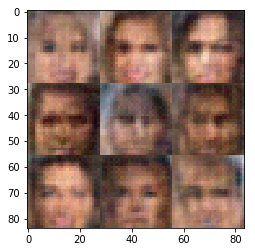

Epoch 1/1... Discriminator Loss: 1.8864... Generator Loss: 0.2696
Epoch 1/1... Discriminator Loss: 2.6769... Generator Loss: 0.1016
Epoch 1/1... Discriminator Loss: 1.9845... Generator Loss: 0.2944
Epoch 1/1... Discriminator Loss: 1.6676... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 2.4409... Generator Loss: 0.2276
Epoch 1/1... Discriminator Loss: 2.8268... Generator Loss: 0.1145
Epoch 1/1... Discriminator Loss: 2.6332... Generator Loss: 0.1343
Epoch 1/1... Discriminator Loss: 2.4729... Generator Loss: 0.1599
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.5721
Epoch 1/1... Discriminator Loss: 2.6804... Generator Loss: 0.1210


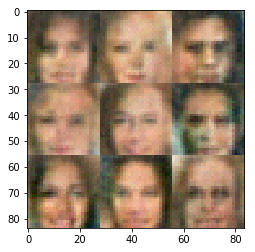

Epoch 1/1... Discriminator Loss: 2.7331... Generator Loss: 0.1080
Epoch 1/1... Discriminator Loss: 2.1297... Generator Loss: 0.1974
Epoch 1/1... Discriminator Loss: 2.2014... Generator Loss: 0.2064
Epoch 1/1... Discriminator Loss: 2.2237... Generator Loss: 0.2065
Epoch 1/1... Discriminator Loss: 2.7777... Generator Loss: 0.1005
Epoch 1/1... Discriminator Loss: 2.9736... Generator Loss: 0.0805
Epoch 1/1... Discriminator Loss: 1.7508... Generator Loss: 0.4272
Epoch 1/1... Discriminator Loss: 2.4056... Generator Loss: 0.1451
Epoch 1/1... Discriminator Loss: 1.3743... Generator Loss: 0.4753
Epoch 1/1... Discriminator Loss: 2.5018... Generator Loss: 0.1077


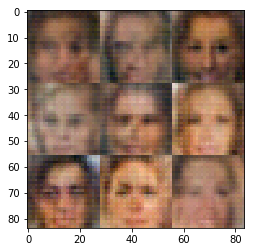

Epoch 1/1... Discriminator Loss: 2.1898... Generator Loss: 0.3326
Epoch 1/1... Discriminator Loss: 2.2610... Generator Loss: 0.2960
Epoch 1/1... Discriminator Loss: 2.9827... Generator Loss: 0.0676
Epoch 1/1... Discriminator Loss: 2.2087... Generator Loss: 0.2708
Epoch 1/1... Discriminator Loss: 2.5170... Generator Loss: 0.1297
Epoch 1/1... Discriminator Loss: 2.1527... Generator Loss: 0.2009
Epoch 1/1... Discriminator Loss: 3.2042... Generator Loss: 0.0651
Epoch 1/1... Discriminator Loss: 2.2760... Generator Loss: 0.2256
Epoch 1/1... Discriminator Loss: 2.9843... Generator Loss: 0.1022
Epoch 1/1... Discriminator Loss: 2.2307... Generator Loss: 0.4620


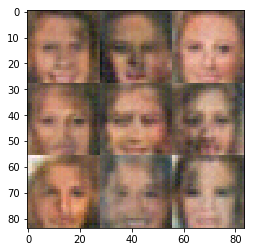

Epoch 1/1... Discriminator Loss: 2.7447... Generator Loss: 0.1459
Epoch 1/1... Discriminator Loss: 2.2731... Generator Loss: 0.1616
Epoch 1/1... Discriminator Loss: 2.5749... Generator Loss: 0.1270
Epoch 1/1... Discriminator Loss: 2.7099... Generator Loss: 0.1519
Epoch 1/1... Discriminator Loss: 1.9530... Generator Loss: 0.3227
Epoch 1/1... Discriminator Loss: 2.1877... Generator Loss: 0.2275
Epoch 1/1... Discriminator Loss: 2.6099... Generator Loss: 0.1244
Epoch 1/1... Discriminator Loss: 2.1933... Generator Loss: 0.1722
Epoch 1/1... Discriminator Loss: 1.8601... Generator Loss: 0.2743
Epoch 1/1... Discriminator Loss: 2.9773... Generator Loss: 0.0871


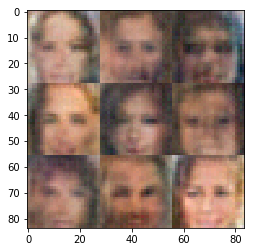

Epoch 1/1... Discriminator Loss: 3.2389... Generator Loss: 0.0584
Epoch 1/1... Discriminator Loss: 2.3873... Generator Loss: 0.1931
Epoch 1/1... Discriminator Loss: 2.8955... Generator Loss: 0.0952
Epoch 1/1... Discriminator Loss: 2.3493... Generator Loss: 0.2050
Epoch 1/1... Discriminator Loss: 1.8722... Generator Loss: 0.2903
Epoch 1/1... Discriminator Loss: 2.8083... Generator Loss: 0.1175
Epoch 1/1... Discriminator Loss: 1.9718... Generator Loss: 0.2437
Epoch 1/1... Discriminator Loss: 3.1941... Generator Loss: 0.0521
Epoch 1/1... Discriminator Loss: 2.8607... Generator Loss: 0.0984
Epoch 1/1... Discriminator Loss: 2.6873... Generator Loss: 0.1341


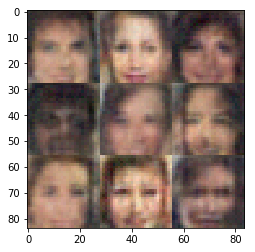

Epoch 1/1... Discriminator Loss: 2.3943... Generator Loss: 0.1760
Epoch 1/1... Discriminator Loss: 1.7244... Generator Loss: 0.3244
Epoch 1/1... Discriminator Loss: 2.4779... Generator Loss: 0.1544
Epoch 1/1... Discriminator Loss: 2.9840... Generator Loss: 0.0910
Epoch 1/1... Discriminator Loss: 2.3603... Generator Loss: 0.2232
Epoch 1/1... Discriminator Loss: 1.6601... Generator Loss: 0.3673
Epoch 1/1... Discriminator Loss: 2.1080... Generator Loss: 0.4405
Epoch 1/1... Discriminator Loss: 3.1775... Generator Loss: 0.0767
Epoch 1/1... Discriminator Loss: 1.4916... Generator Loss: 0.4264
Epoch 1/1... Discriminator Loss: 1.9918... Generator Loss: 0.2789


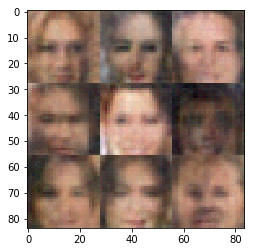

Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 0.5492
Epoch 1/1... Discriminator Loss: 1.1260... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.0313... Generator Loss: 0.7576
Epoch 1/1... Discriminator Loss: 2.1340... Generator Loss: 0.2530
Epoch 1/1... Discriminator Loss: 2.6935... Generator Loss: 1.1415
Epoch 1/1... Discriminator Loss: 2.8785... Generator Loss: 0.1185
Epoch 1/1... Discriminator Loss: 2.5036... Generator Loss: 0.1604
Epoch 1/1... Discriminator Loss: 2.4385... Generator Loss: 0.1585
Epoch 1/1... Discriminator Loss: 2.0775... Generator Loss: 0.2615
Epoch 1/1... Discriminator Loss: 2.4042... Generator Loss: 0.1612


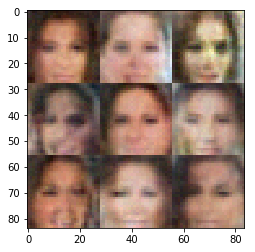

Epoch 1/1... Discriminator Loss: 2.3850... Generator Loss: 0.1882
Epoch 1/1... Discriminator Loss: 1.8501... Generator Loss: 0.2707
Epoch 1/1... Discriminator Loss: 2.1239... Generator Loss: 0.2707
Epoch 1/1... Discriminator Loss: 2.4977... Generator Loss: 0.1459
Epoch 1/1... Discriminator Loss: 1.5862... Generator Loss: 0.3819
Epoch 1/1... Discriminator Loss: 1.8553... Generator Loss: 0.3218
Epoch 1/1... Discriminator Loss: 1.2504... Generator Loss: 0.5146
Epoch 1/1... Discriminator Loss: 2.7975... Generator Loss: 0.2626
Epoch 1/1... Discriminator Loss: 2.7660... Generator Loss: 0.1592
Epoch 1/1... Discriminator Loss: 3.0647... Generator Loss: 0.0826


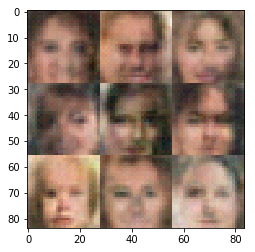

Epoch 1/1... Discriminator Loss: 2.7975... Generator Loss: 0.1184
Epoch 1/1... Discriminator Loss: 2.3613... Generator Loss: 0.1666
Epoch 1/1... Discriminator Loss: 1.5409... Generator Loss: 0.4619
Epoch 1/1... Discriminator Loss: 1.9336... Generator Loss: 0.3552
Epoch 1/1... Discriminator Loss: 2.5523... Generator Loss: 0.1630
Epoch 1/1... Discriminator Loss: 1.9896... Generator Loss: 0.3590
Epoch 1/1... Discriminator Loss: 2.5501... Generator Loss: 0.1537
Epoch 1/1... Discriminator Loss: 2.4052... Generator Loss: 0.1650
Epoch 1/1... Discriminator Loss: 2.1458... Generator Loss: 0.2613
Epoch 1/1... Discriminator Loss: 1.7875... Generator Loss: 0.3113


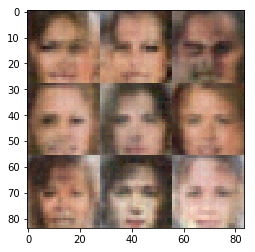

Epoch 1/1... Discriminator Loss: 2.3201... Generator Loss: 1.1916
Epoch 1/1... Discriminator Loss: 2.4988... Generator Loss: 0.2155
Epoch 1/1... Discriminator Loss: 2.4338... Generator Loss: 0.1962
Epoch 1/1... Discriminator Loss: 1.6467... Generator Loss: 0.3933
Epoch 1/1... Discriminator Loss: 2.1369... Generator Loss: 0.1929
Epoch 1/1... Discriminator Loss: 1.8384... Generator Loss: 0.3101
Epoch 1/1... Discriminator Loss: 1.7683... Generator Loss: 0.3725
Epoch 1/1... Discriminator Loss: 2.6207... Generator Loss: 0.1366
Epoch 1/1... Discriminator Loss: 2.1757... Generator Loss: 0.2210
Epoch 1/1... Discriminator Loss: 2.2384... Generator Loss: 0.2327


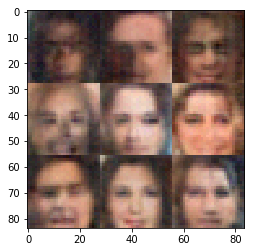

Epoch 1/1... Discriminator Loss: 1.7422... Generator Loss: 0.4112
Epoch 1/1... Discriminator Loss: 1.7514... Generator Loss: 0.3935
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.5352
Epoch 1/1... Discriminator Loss: 1.8918... Generator Loss: 0.2666
Epoch 1/1... Discriminator Loss: 1.3919... Generator Loss: 0.4900
Epoch 1/1... Discriminator Loss: 2.5484... Generator Loss: 0.1658
Epoch 1/1... Discriminator Loss: 3.1685... Generator Loss: 1.2907
Epoch 1/1... Discriminator Loss: 2.1759... Generator Loss: 0.2791
Epoch 1/1... Discriminator Loss: 2.6042... Generator Loss: 0.1525
Epoch 1/1... Discriminator Loss: 1.6185... Generator Loss: 0.5798


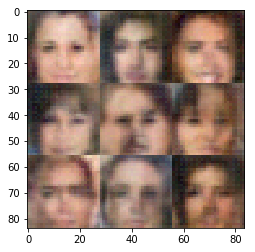

Epoch 1/1... Discriminator Loss: 2.4778... Generator Loss: 0.1520
Epoch 1/1... Discriminator Loss: 2.5138... Generator Loss: 0.1529
Epoch 1/1... Discriminator Loss: 1.7430... Generator Loss: 0.3006
Epoch 1/1... Discriminator Loss: 1.7232... Generator Loss: 0.3999
Epoch 1/1... Discriminator Loss: 1.7893... Generator Loss: 0.2807
Epoch 1/1... Discriminator Loss: 1.2046... Generator Loss: 0.7288
Epoch 1/1... Discriminator Loss: 2.3671... Generator Loss: 0.1415
Epoch 1/1... Discriminator Loss: 2.3072... Generator Loss: 0.3381
Epoch 1/1... Discriminator Loss: 2.1373... Generator Loss: 0.4207
Epoch 1/1... Discriminator Loss: 2.0952... Generator Loss: 0.2266


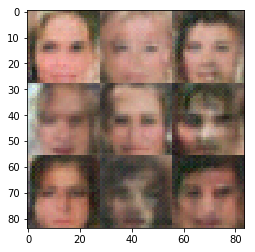

Epoch 1/1... Discriminator Loss: 3.2647... Generator Loss: 0.0598
Epoch 1/1... Discriminator Loss: 2.0616... Generator Loss: 0.2224
Epoch 1/1... Discriminator Loss: 1.8849... Generator Loss: 0.2901
Epoch 1/1... Discriminator Loss: 1.6585... Generator Loss: 0.3810
Epoch 1/1... Discriminator Loss: 2.0234... Generator Loss: 0.2585
Epoch 1/1... Discriminator Loss: 2.1896... Generator Loss: 0.2321
Epoch 1/1... Discriminator Loss: 1.6689... Generator Loss: 0.3372
Epoch 1/1... Discriminator Loss: 3.3050... Generator Loss: 0.0468
Epoch 1/1... Discriminator Loss: 2.0829... Generator Loss: 0.3586
Epoch 1/1... Discriminator Loss: 2.7460... Generator Loss: 0.1253


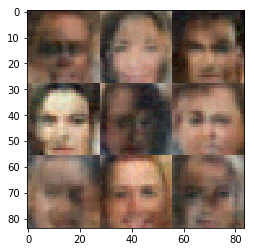

Epoch 1/1... Discriminator Loss: 2.4629... Generator Loss: 0.1427
Epoch 1/1... Discriminator Loss: 3.0337... Generator Loss: 0.0756
Epoch 1/1... Discriminator Loss: 2.2435... Generator Loss: 0.1703
Epoch 1/1... Discriminator Loss: 2.6864... Generator Loss: 0.1692
Epoch 1/1... Discriminator Loss: 2.1025... Generator Loss: 0.2130
Epoch 1/1... Discriminator Loss: 1.6987... Generator Loss: 0.4085
Epoch 1/1... Discriminator Loss: 2.6965... Generator Loss: 0.1131
Epoch 1/1... Discriminator Loss: 2.3362... Generator Loss: 0.1614
Epoch 1/1... Discriminator Loss: 2.2878... Generator Loss: 0.1776
Epoch 1/1... Discriminator Loss: 1.2500... Generator Loss: 0.6392


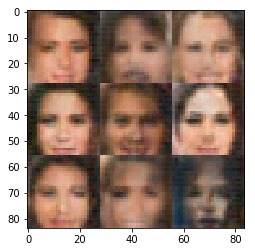

Epoch 1/1... Discriminator Loss: 1.8894... Generator Loss: 0.3078
Epoch 1/1... Discriminator Loss: 1.6183... Generator Loss: 0.4734
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.4712
Epoch 1/1... Discriminator Loss: 1.5470... Generator Loss: 0.4250
Epoch 1/1... Discriminator Loss: 3.5712... Generator Loss: 1.8563
Epoch 1/1... Discriminator Loss: 2.0594... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 2.7496... Generator Loss: 0.1583
Epoch 1/1... Discriminator Loss: 2.9844... Generator Loss: 0.0793
Epoch 1/1... Discriminator Loss: 2.3941... Generator Loss: 0.1580
Epoch 1/1... Discriminator Loss: 1.5808... Generator Loss: 0.4864


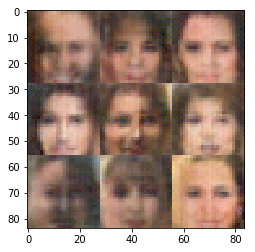

Epoch 1/1... Discriminator Loss: 1.7414... Generator Loss: 0.3526
Epoch 1/1... Discriminator Loss: 1.6738... Generator Loss: 0.4917
Epoch 1/1... Discriminator Loss: 1.7753... Generator Loss: 0.4275
Epoch 1/1... Discriminator Loss: 2.2243... Generator Loss: 0.2044
Epoch 1/1... Discriminator Loss: 2.1139... Generator Loss: 0.2257
Epoch 1/1... Discriminator Loss: 2.6727... Generator Loss: 0.1151
Epoch 1/1... Discriminator Loss: 1.5069... Generator Loss: 0.3956
Epoch 1/1... Discriminator Loss: 1.8785... Generator Loss: 0.2813
Epoch 1/1... Discriminator Loss: 1.9480... Generator Loss: 0.3223
Epoch 1/1... Discriminator Loss: 1.8974... Generator Loss: 0.2997


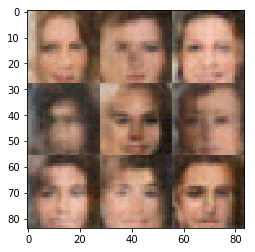

Epoch 1/1... Discriminator Loss: 1.7157... Generator Loss: 0.3377
Epoch 1/1... Discriminator Loss: 1.9415... Generator Loss: 0.2493
Epoch 1/1... Discriminator Loss: 1.6788... Generator Loss: 0.3467
Epoch 1/1... Discriminator Loss: 2.1952... Generator Loss: 0.2219
Epoch 1/1... Discriminator Loss: 1.6817... Generator Loss: 0.3281
Epoch 1/1... Discriminator Loss: 1.6233... Generator Loss: 0.4182
Epoch 1/1... Discriminator Loss: 1.8940... Generator Loss: 0.3316
Epoch 1/1... Discriminator Loss: 6.5179... Generator Loss: 0.0082
Epoch 1/1... Discriminator Loss: 2.3531... Generator Loss: 0.2761
Epoch 1/1... Discriminator Loss: 2.7413... Generator Loss: 0.1666


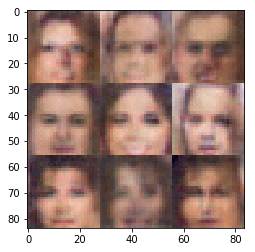

Epoch 1/1... Discriminator Loss: 2.5018... Generator Loss: 0.1706
Epoch 1/1... Discriminator Loss: 2.3411... Generator Loss: 0.1796
Epoch 1/1... Discriminator Loss: 1.7683... Generator Loss: 0.3759
Epoch 1/1... Discriminator Loss: 2.2385... Generator Loss: 0.2211
Epoch 1/1... Discriminator Loss: 1.7884... Generator Loss: 0.5759
Epoch 1/1... Discriminator Loss: 2.0769... Generator Loss: 0.2992
Epoch 1/1... Discriminator Loss: 2.6224... Generator Loss: 0.2074
Epoch 1/1... Discriminator Loss: 2.4777... Generator Loss: 0.1732
Epoch 1/1... Discriminator Loss: 3.1381... Generator Loss: 0.0688
Epoch 1/1... Discriminator Loss: 3.2121... Generator Loss: 0.0670


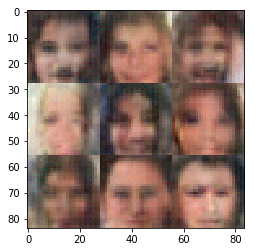

Epoch 1/1... Discriminator Loss: 2.2551... Generator Loss: 0.2198
Epoch 1/1... Discriminator Loss: 2.6955... Generator Loss: 0.1133
Epoch 1/1... Discriminator Loss: 2.5640... Generator Loss: 0.1331
Epoch 1/1... Discriminator Loss: 2.8114... Generator Loss: 0.1158
Epoch 1/1... Discriminator Loss: 2.5563... Generator Loss: 0.1500
Epoch 1/1... Discriminator Loss: 2.5213... Generator Loss: 0.1672
Epoch 1/1... Discriminator Loss: 2.6890... Generator Loss: 0.1115
Epoch 1/1... Discriminator Loss: 1.2983... Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 2.5919... Generator Loss: 0.1605
Epoch 1/1... Discriminator Loss: 3.2327... Generator Loss: 0.0713


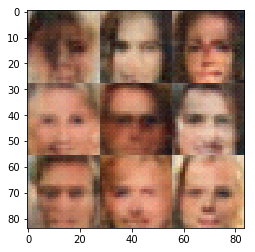

Epoch 1/1... Discriminator Loss: 3.1673... Generator Loss: 0.0988
Epoch 1/1... Discriminator Loss: 2.8560... Generator Loss: 0.1223
Epoch 1/1... Discriminator Loss: 2.5165... Generator Loss: 0.1393
Epoch 1/1... Discriminator Loss: 2.1888... Generator Loss: 0.2118
Epoch 1/1... Discriminator Loss: 1.6384... Generator Loss: 0.3551
Epoch 1/1... Discriminator Loss: 1.7070... Generator Loss: 0.3271
Epoch 1/1... Discriminator Loss: 1.4119... Generator Loss: 0.4987
Epoch 1/1... Discriminator Loss: 0.9980... Generator Loss: 0.9229
Epoch 1/1... Discriminator Loss: 1.8801... Generator Loss: 0.2601
Epoch 1/1... Discriminator Loss: 1.5321... Generator Loss: 0.5011


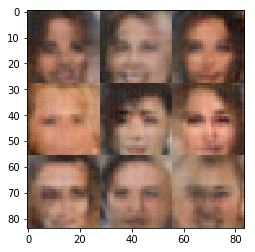

Epoch 1/1... Discriminator Loss: 1.9152... Generator Loss: 0.2737
Epoch 1/1... Discriminator Loss: 1.6533... Generator Loss: 0.3881
Epoch 1/1... Discriminator Loss: 1.8522... Generator Loss: 0.3700
Epoch 1/1... Discriminator Loss: 1.4429... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.5063
Epoch 1/1... Discriminator Loss: 1.1787... Generator Loss: 0.6103
Epoch 1/1... Discriminator Loss: 2.3837... Generator Loss: 0.2043
Epoch 1/1... Discriminator Loss: 3.9647... Generator Loss: 2.5758
Epoch 1/1... Discriminator Loss: 2.3878... Generator Loss: 0.3153
Epoch 1/1... Discriminator Loss: 3.3343... Generator Loss: 0.0766


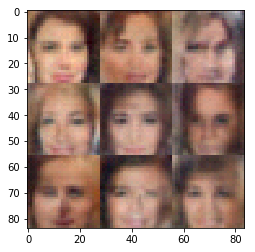

Epoch 1/1... Discriminator Loss: 3.1839... Generator Loss: 0.1085
Epoch 1/1... Discriminator Loss: 2.3618... Generator Loss: 0.3769
Epoch 1/1... Discriminator Loss: 2.0543... Generator Loss: 0.2649
Epoch 1/1... Discriminator Loss: 2.7141... Generator Loss: 0.1293
Epoch 1/1... Discriminator Loss: 1.8889... Generator Loss: 0.3305
Epoch 1/1... Discriminator Loss: 1.9797... Generator Loss: 0.2602
Epoch 1/1... Discriminator Loss: 1.5203... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 3.1185... Generator Loss: 0.0694
Epoch 1/1... Discriminator Loss: 3.2238... Generator Loss: 0.0626


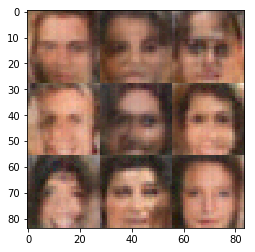

Epoch 1/1... Discriminator Loss: 3.3720... Generator Loss: 0.0601
Epoch 1/1... Discriminator Loss: 3.0600... Generator Loss: 0.1093
Epoch 1/1... Discriminator Loss: 2.7017... Generator Loss: 0.1423
Epoch 1/1... Discriminator Loss: 1.6241... Generator Loss: 0.4346
Epoch 1/1... Discriminator Loss: 3.1778... Generator Loss: 0.0676
Epoch 1/1... Discriminator Loss: 2.1323... Generator Loss: 0.2441


In [13]:
batch_size = 64
z_dim = 3136
learning_rate = 0.001
beta1 = 0.5



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.